In [1]:
import pandas as pd

# network analysis
import networkx as nx

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud, STOPWORDS

In [2]:
# load data
kaminski_parsed = pd.read_csv('../data/kaminski_parsed.csv')
kaminski_edges = pd.read_csv('../data/kaminski_edges.csv')
to_kaminski_edges = pd.read_csv('../data/to_kaminski_edges.csv')

### Explore Kaminski data

In [3]:
kaminski_parsed.dropna(subset=['To'], inplace=True)

In [4]:
kaminski_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8626 entries, 0 to 8643
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Message-ID                 8626 non-null   object 
 1   Date                       8626 non-null   object 
 2   From                       8626 non-null   object 
 3   To                         8626 non-null   object 
 4   Subject                    8249 non-null   object 
 5   Mime-Version               8626 non-null   float64
 6   Content-Type               8626 non-null   object 
 7   Content-Transfer-Encoding  8626 non-null   object 
 8   X-From                     8626 non-null   object 
 9   X-To                       8626 non-null   object 
 10  X-cc                       2888 non-null   object 
 11  X-bcc                      7 non-null      object 
 12  X-Folder                   8626 non-null   object 
 13  X-Origin                   8626 non-null   objec

In [5]:
kaminski_parsed.head(5)

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,Cc,Bcc
0,<28519439.1075856498412.JavaMail.evans@thyme>,"Mon, 7 May 2001 08:41:00 -0700 (PDT)",vince.kaminski@enron.com,"stephen.stock@enron.com, beth.perlman@enron.com",A resume for Londom,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,"Stephen Stock, Beth Perlman",NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,This is a resume of one guy I met in Houston a...,NaN,NaN
1,<27897591.1075856498629.JavaMail.evans@thyme>,"Mon, 7 May 2001 05:28:00 -0700 (PDT)",vince.kaminski@enron.com,vkaminski@aol.com,Btu's Weekly Power Report,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN
2,<28538884.1075856500656.JavaMail.evans@thyme>,"Mon, 30 Apr 2001 08:47:00 -0700 (PDT)",vince.kaminski@enron.com,vkaminski@aol.com,NaN,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"http://www.x10.com/home/offer.cgi?!BF1,../blue...",NaN,NaN
3,<1815195.1075856526599.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 08:07:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,FYI\n\nVince\n---------------------- Forwarded...,NaN,NaN
4,<7019447.1075856526621.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 08:05:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN


In [6]:
kaminski_parsed['Date'].describe()

count                                     8626
unique                                    4987
top       Fri, 4 Feb 2000 10:12:00 -0800 (PST)
freq                                         6
Name: Date, dtype: object

In [40]:
kaminski_edges

,sender,recipient,num_emails
0,vince.kaminski@enron.com,vince.kaminski@enron.com,4571
1,vince.kaminski@enron.com,vkaminski@aol.com,2754
2,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1450
3,vince.kaminski@enron.com,stinson.gibner@enron.com,712
4,j.kaminski@enron.com,vkaminski@aol.com,591
...,...,...,...
1132,j.kaminski@enron.com,laura.luce@enron.com,1
1133,j.kaminski@enron.com,kristin.walsh@enron.com,1
1134,j.kaminski@enron.com,khymberly.booth@enron.com,1
1135,j.kaminski@enron.com,kevin.golden@enron.com,1


In [41]:
kaminski_edges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 1136
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sender      1136 non-null   object
 1   recipient   1136 non-null   object
 2   num_emails  1136 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 35.5+ KB


In [38]:
kaminski_edges.dropna(subset=['recipient'], inplace=True)

In [39]:
# check whether Kaminski send emails to Lay and Skilling
kaminski_edges[kaminski_edges['recipient'].str.contains('kenneth.lay@enron.com|jeff.skilling@enron.com')]

,sender,recipient,num_emails
102,vince.kaminski@enron.com,jeff.skilling@enron.com,16
254,vince.kaminski@enron.com,kenneth.lay@enron.com,6


In [43]:
kaminski_top10 = kaminski_edges.head(10)
kaminski_top10['weight'] = kaminski_top10['num_emails'] / kaminski_top10['num_emails'].sum()
kaminski_top10

/home/agnes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sender,recipient,num_emails,weight
0,vince.kaminski@enron.com,vince.kaminski@enron.com,4571,0.409294
1,vince.kaminski@enron.com,vkaminski@aol.com,2754,0.246597
2,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1450,0.129835
3,vince.kaminski@enron.com,stinson.gibner@enron.com,712,0.063754
4,j.kaminski@enron.com,vkaminski@aol.com,591,0.052919
5,vince.kaminski@enron.com,vasant.shanbhogue@enron.com,308,0.027579
6,vince.kaminski@enron.com,mike.roberts@enron.com,231,0.020684
7,vince.kaminski@enron.com,grant.masson@enron.com,200,0.017908
8,vince.kaminski@enron.com,pinnamaneni.krishnarao@enron.com,179,0.016028
9,j.kaminski@enron.com,shirley.crenshaw@enron.com,172,0.015401


In [44]:
kaminski_parsed['To'] = kaminski_parsed['To'].str.strip(' \n\t')
kaminski_top10_content = kaminski_parsed[kaminski_parsed['To'].str.contains('vince.kaminski.enron.com|j.kaminski@enron.com|shirley.crenshaw@enron.com|stinson.gibner@enron.com|vasant.shanbhogue@enron.com|mike.roberts@enron.com|grant.masson@enron.com|pinnamaneni.krishnarao@enron.com')]
kaminski_top10_content

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,Cc,Bcc
3,<1815195.1075856526599.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 08:07:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,FYI\n\nVince\n---------------------- Forwarded...,NaN,NaN
4,<7019447.1075856526621.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 08:05:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN
10,<18755653.1075856526751.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 06:53:00 -0800 (PST)",vince.kaminski@enron.com,shirley.crenshaw@enron.com,PLEASE NOTE THAT THE DATE FOR THE 1ST MEETING ...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Shirley Crenshaw,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Shirley,\n\n Please put it on my calendar.\n\n...",vince.kaminski@enron.com,vince.kaminski@enron.com
11,<15937464.1075856526775.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 06:52:00 -0800 (PST)",vince.kaminski@enron.com,shirley.crenshaw@enron.com,asking for advice regarding Summer Associate p...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Shirley Crenshaw,"Vince J Kaminski, Stinson Gibner, Zimin Lu",NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Shirley,\n\nPlease, set up a phone interview w...","vince.kaminski@enron.com, stinson.gibner@enron...","vince.kaminski@enron.com, stinson.gibner@enron..."
21,<28371680.1075856527032.JavaMail.evans@thyme>,"Thu, 11 Jan 2001 00:22:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,Request Submitted: Access Request for jennifer...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Stinson,\n\nDo you know anything about it?\n\n...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,<15427931.1075856459564.JavaMail.evans@thyme>,"Wed, 17 Jan 2001 05:44:00 -0800 (PST)",vince.kaminski@enron.com,shirley.crenshaw@enron.com,Re: Wall Street Journal for Jason Sokolov,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Shirley Crenshaw,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"Shirley,\n\nNo problem.\n\nVince\n\n\n\n\nShir...",NaN,NaN
8613,<26357623.1075856459608.JavaMail.evans@thyme>,"Wed, 17 Jan 2001 05:40:00 -0800 (PST)",vince.kaminski@enron.com,shirley.crenshaw@enron.com,Reminder of Transmission Roundtable Meeting on...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Shirley Crenshaw,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"Shirley,\n\nPlease, put it on my schedule.\n\n...",NaN,NaN
8617,<18517837.1075856459699.JavaMail.evans@thyme>,"Wed, 17 Jan 2001 05:29:00 -0800 (PST)",vince.kaminski@enron.com,shirley.crenshaw@enron.com,Re: Petronas benchmarking visit,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Shirley Crenshaw,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"Shirley,\n\nPlease, try the E-mail address bel...",NaN,NaN
8625,<13910754.1075856459880.JavaMail.evans@thyme>,"Tue, 16 Jan 2001 05:52:00 -0800 (PST)",vince.kaminski@enron.com,shirley.crenshaw@enron.com,Ms. Kao,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Shirley Crenshaw,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"Shirley,\n\nPlease, invite her for an intervie...",vince.kaminski@enron.com,vince.kaminski@enron.com


In [45]:
kaminski_ls_content = kaminski_parsed[kaminski_parsed['To'].str.contains('kenneth.lay@enron.com|jeff.skilling@enron.com')]
kaminski_ls_content

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,Cc,Bcc
92,<3739682.1075856528550.JavaMail.evans@thyme>,"Thu, 4 Jan 2001 07:30:00 -0800 (PST)",vince.kaminski@enron.com,jeff.skilling@enron.com,Dhabol,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Jeff Skilling,"Vince J Kaminski, Jeffrey A Shankman, Sandeep ...",NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Jeff,\n\nWe shall forward to you shortly a cop...","vince.kaminski@enron.com, jeffrey.shankman@enr...","vince.kaminski@enron.com, jeffrey.shankman@enr..."
1038,<6848569.1075856548745.JavaMail.evans@thyme>,"Wed, 20 Sep 2000 06:32:00 -0700 (PDT)",vince.kaminski@enron.com,jeff.skilling@enron.com,Re: University of Texas conference on energy f...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Jeff Skilling,Vince J Kaminski,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Sherri, \n\nThanks. Yes, It's February the 22n...",vince.kaminski@enron.com,vince.kaminski@enron.com
1041,<3064389.1075856548790.JavaMail.evans@thyme>,"Wed, 20 Sep 2000 04:41:00 -0700 (PDT)",vince.kaminski@enron.com,jeff.skilling@enron.com,University of Texas conference on energy finan...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Jeff Skilling,"Vince J Kaminski, Richard Causey",NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Jeff,\n\nOur friends at the University of Texa...","vince.kaminski@enron.com, richard.causey@enron...","vince.kaminski@enron.com, richard.causey@enron..."
1401,<4666663.1075856557048.JavaMail.evans@thyme>,"Tue, 1 Aug 2000 08:40:00 -0700 (PDT)",vince.kaminski@enron.com,jeff.skilling@enron.com,Wharton Partnership,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Jeff Skilling,"Jeffrey A Shankman, Vince J Kaminski, Mark Palmer",NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Jeff,\n\nI am sending you a recommendation reg...","jeffrey.shankman@enron.com, vince.kaminski@enr...","jeffrey.shankman@enron.com, vince.kaminski@enr..."
1681,<17733364.1075856563227.JavaMail.evans@thyme>,"Tue, 20 Jun 2000 09:27:00 -0700 (PDT)",vince.kaminski@enron.com,kenneth.lay@enron.com,Re: Molecular Electronics Corp. Working Lunch,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Kenneth Lay,"Vince J Kaminski, Shirley Crenshaw",NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Ken,\n\nI shall be glad to join you for lunch ...","vince.kaminski@enron.com, shirley.crenshaw@enr...","vince.kaminski@enron.com, shirley.crenshaw@enr..."
1891,<25275319.1075856984128.JavaMail.evans@thyme>,"Sat, 3 Jun 2000 08:35:00 -0700 (PDT)",vince.kaminski@enron.com,jeff.skilling@enron.com,Managing Enron's relationships with the univer...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Jeff Skilling,"Vince J Kaminski, Jeffrey A Shankman",NaN,\Vincent_Kaminski_Jun2001_8\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Jeff,\n\nI would like to get on your calendar ...","vince.kaminski@enron.com, jeffrey.shankman@enr...","vince.kaminski@enron.com, jeffrey.shankman@enr..."
2323,<21798470.1075856994917.JavaMail.evans@thyme>,"Mon, 27 Mar 2000 08:43:00 -0800 (PST)",vince.kaminski@enron.com,jeff.skilling@enron.com,Off-site: John Griebling's organization and Re...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Jeff Skilling,"Vince J Kaminski, Stinson Gibner, Ravi Thurais...",NaN,\Vincent_Kaminski_Jun2001_8\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"Jeff,\n\nI would like to invite you to an off-...","vince.kaminski@enron.com, stinson.gibner@enron...","vince.kaminski@enron.com, stinson.gibner@enron..."
4990,<32014652.1075858475211.JavaMail.evans@thyme>,"Fri, 1 Jun 2001 15:31:48 -0700 (PDT)",kaminski@enron.com,jeff.skilling@enron.com,Enterprise Wide Risk Management,1.0,text/plain; charset=us-ascii,7bit,"Kaminski, Vince J","Skilling, Jeff </o=ENRON/ou=NA/cn=Recipi

### display unique senders and recipients per person

In [10]:
kaminski_edges['sender'].value_counts()

vince.kaminski@enron.com    812
j.kaminski@enron.com        325
Name: sender, dtype: int64

In [11]:
kaminski_edges['recipient'].value_counts().sort_values(ascending=False)

kristin.gandy@enron.com     2
anita.dupont@enron.com      2
eronn@mail.utexas.edu       2
vkaminski@aol.com           2
molly.magee@enron.com       2
                           ..
brittab@infocastinc.com     1
nazareth@rice.edu           1
rob.bradley@enron.com       1
david.delainey@enron.com    1
sarah.brown@enron.com       1
Name: recipient, Length: 1009, dtype: int64

In [12]:
to_kaminski_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sender      18 non-null     object
 1   recipient   18 non-null     object
 2   num_emails  18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


# Viz Kaminski
## Network

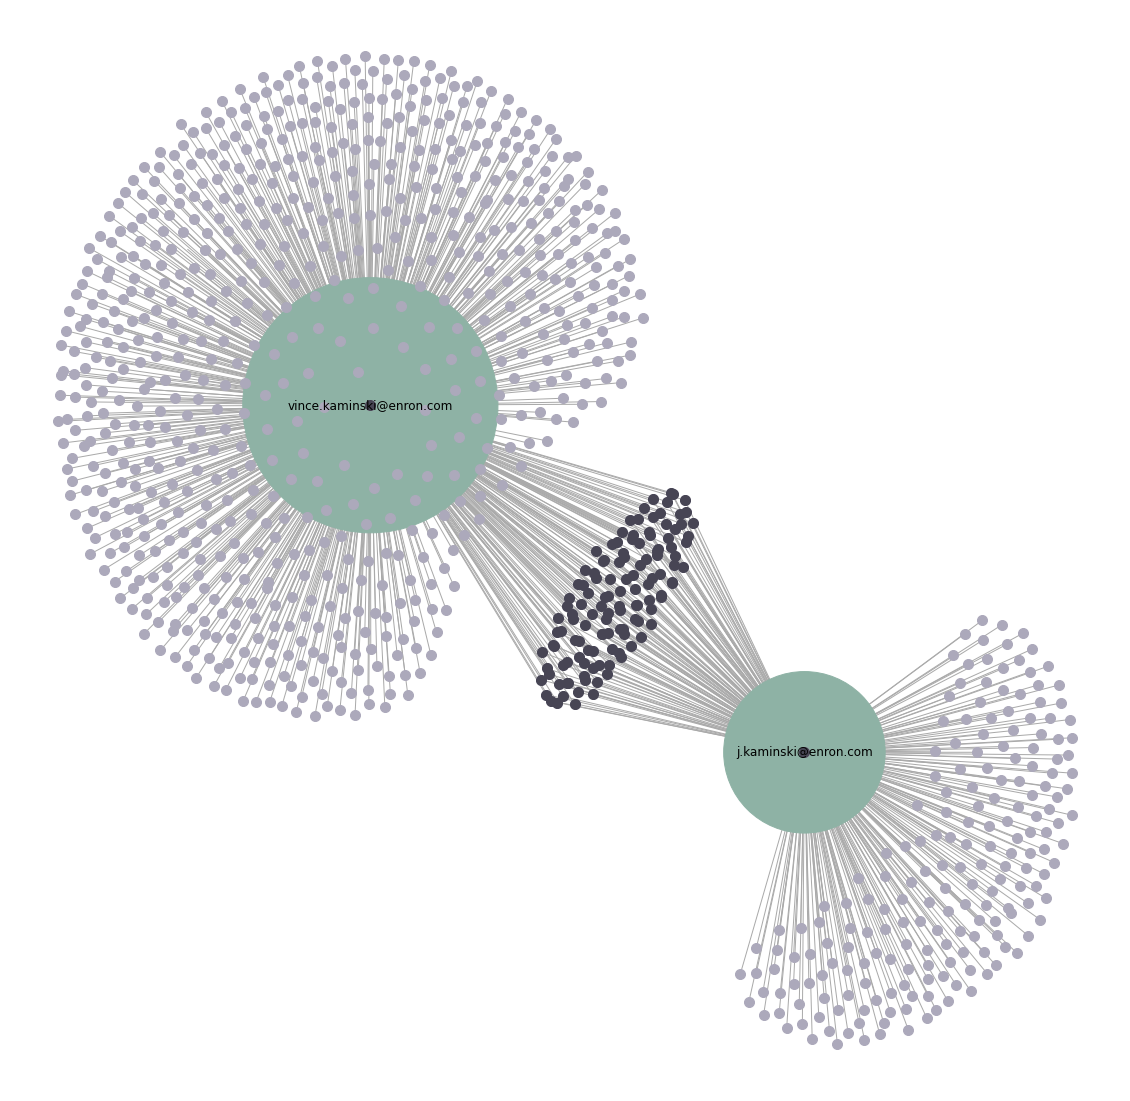

In [13]:
# create network graph for Kaminski
G_kam = nx.from_pandas_edgelist(kaminski_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_kam = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_kam = nx.spring_layout(G_kam, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_kam, layout_kam, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_kam = [node for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
size_kam = [G_kam.degree(node) * 80 for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=sender_kam, node_size=size_kam, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=recipients_kam, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique() and G_kam.degree(node) > 1]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=high_degree_recipients_kam, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_kam = dict(zip(sender_kam, sender_kam))
nx.draw_networkx_labels(G_kam, layout_kam, labels=sender_dict_kam)

plt.axis('off')
#plt.title('Network of Vincent Kaminski\'s Outgoing Emails')
#plt.legend()
plt.show()
fig_kam.savefig('../plots/kaminski_network2.png')

## Kaminskis Top10 Network

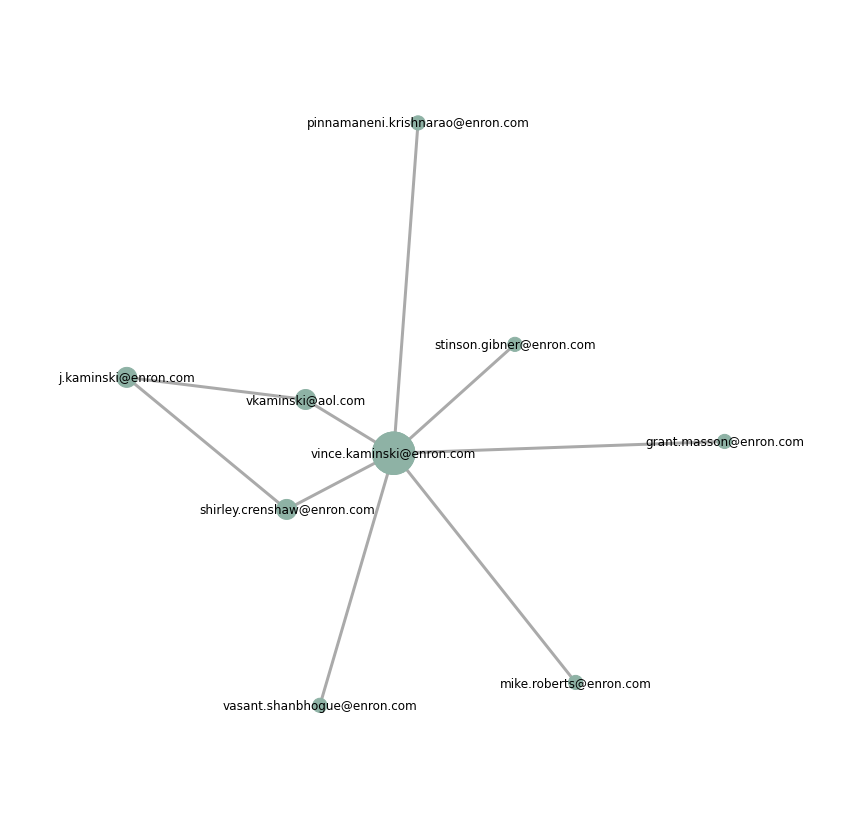

In [14]:
# create network graph for Kaminski
G_top = nx.from_pandas_edgelist(kaminski_top10, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_top = plt.figure(figsize=(15, 15))

# create a layout for the nodes
layout_top = nx.spring_layout(G_top, k=0.3, iterations=80, weight='num_emails')

# draw the edges
nx.draw_networkx_edges(G_top, layout_top, width=3, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_top = [node for node in G_kam.nodes() if node in kaminski_top10['sender'].unique()]
size_top = [G_top.degree(node) * 200 for node in G_top.nodes() if node in kaminski_top10['sender'].unique()]
nx.draw_networkx_nodes(G_top, layout_top, nodelist=sender_top, node_size=size_top, node_color='#8EB2A5', label=kaminski_top10['sender'].unique())

# create and draw all recipient nodes
recipients_top = [node for node in G_top.nodes() if node in kaminski_top10['recipient'].unique()]
size_rec = [G_top.degree(node) * 200 for node in G_top.nodes() if node in kaminski_top10['recipient'].unique()]
nx.draw_networkx_nodes(G_top, layout_top, nodelist=recipients_top, node_size=size_rec, node_color='#8EB2A5', label=kaminski_top10['sender'].unique())

# label the sender nodes
dict_top = dict(zip(layout_top.keys(), layout_top.keys()))
nx.draw_networkx_labels(G_top, layout_top, labels=dict_top)

plt.axis('off')
#plt.title('Top 10 Recipients in Vincent Kaminski\'s Outgoing Emails')
plt.margins(x=0.2, y=0.2, tight=False)
plt.show()
fig_top.savefig('../plots/kaminski_network_top10.png')

## Degree Centrality
Measures the extent to which a given node is connected to all the other nodes

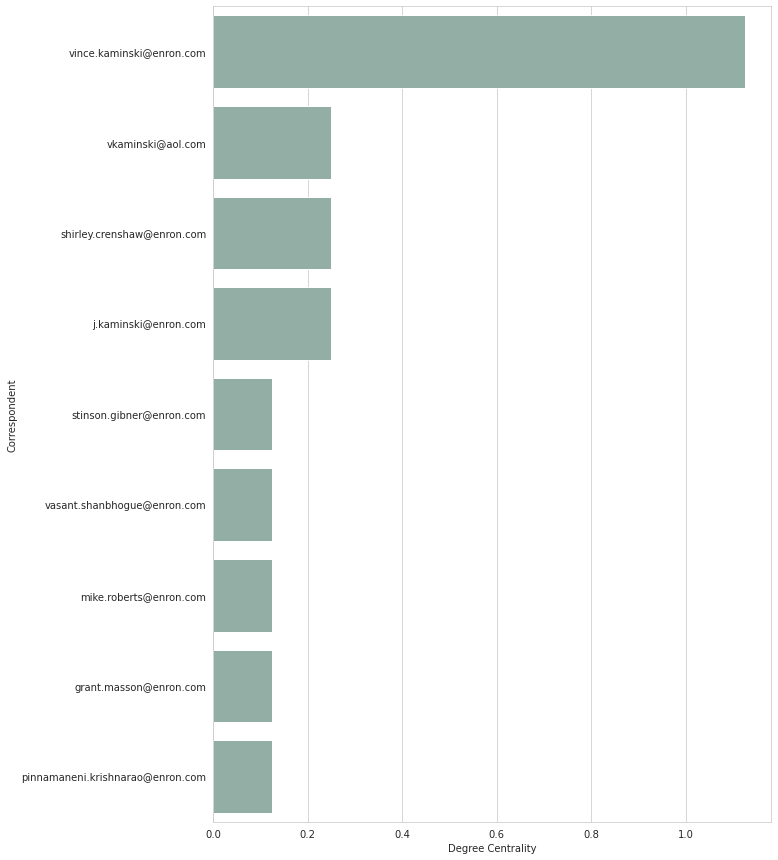

In [21]:
cent = nx.degree_centrality(G_top)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

fig_cent = plt.figure(figsize=(10, 15))
_ = sns.barplot(x='centrality', y='name', data=cent, orient='h', color='#8EB2A5')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
#_ = plt.title('Top 10 Degree Centrality Scores in Vincent Kaminskis Network')
plt.show()
fig_cent.savefig('../plots/kaminski_centrality2.png')

## Top10 Correspondents WordCloud of Email Content

In [16]:
content = ' '.join(review for review in kaminski_top10_content['content'])
stopwords = set(STOPWORDS)
stopwords.update(('Please', 'let', 'Vince', 'Kaminski', 'Subject', 'fwd','RE','FW','Hello', 'Forwarded','Shirley',
                 'Crenshaw', 'Stinson', 'Gibner', 'may', 'FYI', 'CC', 'well', 'NA', 'vkamins', 'utexas', 'edu',
                 'Thank', 'Thanks','PM', 'baylor', 'vasant', 'grant', 'masson', 'shanbhogue', 'Enron', 
                  'Original Message', 'Original', 'Message'))

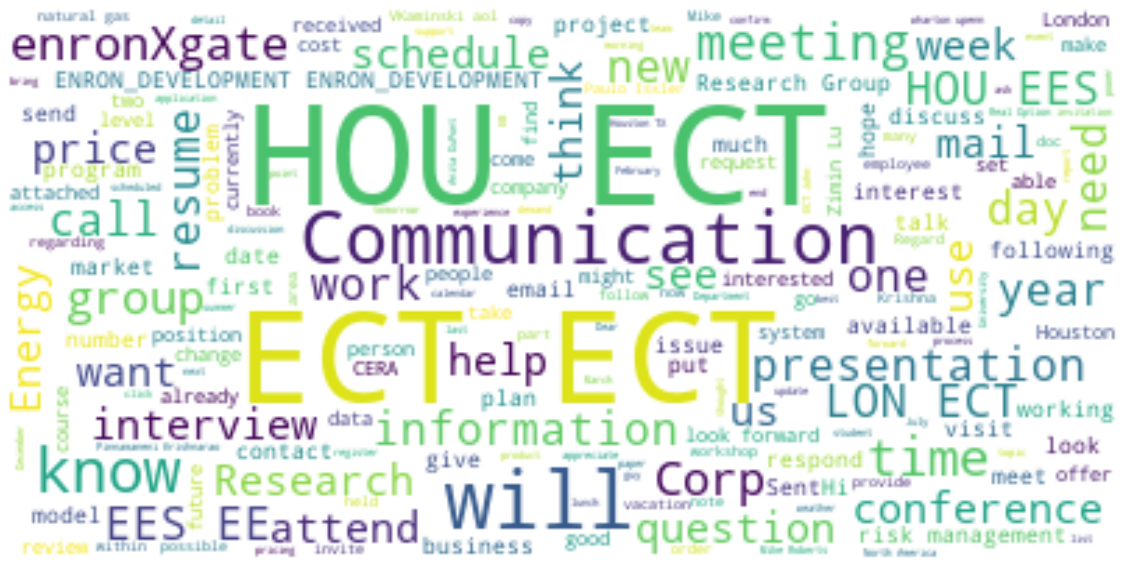

In [17]:
fig = plt.figure(figsize=(20, 20))
wc = WordCloud(max_font_size=50,
               max_words=200,
               stopwords=stopwords,
               background_color="white").generate(content)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
wc.to_file('../plots/kaminski_top10_wordcloud2.png')

In [18]:
stopwords.update(('fwd','RE','FW','Hello','Meeting','Ga','Access','positions','list','forward','Forwarded', 'floor',
    'corp','please','vince','time','mail','john','kay','day','message','week','kaminski','year', 'Enron', 'go'
    'meeting','question','group','work','call','scott','company','let','mann','date','number', 'mark','today',
    'david','mike','houston','chris','subject','way','bass','edu','office','doc','don', 'month','copy','name',
    'comment','email','need','phone','point','thing','look','ben','michael','list', 'help','delainey','fax',
    'morning','use','tomorrow','thank','phillip','hotmail','guy','robert','night','lon', 'part','talk','kate',
    'home','mailto','person','address','form','something','line','hour', 'place','march','love','anything','paul',
    'giron','smith','hope','darron','jim','kevin','weekend','george', 'north','someone','richard','bob','jacoby','ena','room','see','desk','area',
    'everyone','greg','detail','jason','afternoon','discussion','tom','kslaw','check','basis','visit','mcconnell',
    'miller','location','peter','monday','response','show','page','jennifer','lot','meet','respond', 'Krishna'
    'yesterday','pdx','house','june','larry','jan','dan','city','july','judy','friday','julie','shirley','meter',
    'level','fyi','addition','martin','anyone','generation','department','type','rick','friend','period','word',
    'lisa','think','class','johnson','org','robin','thompson','columbiagas','didn','april','william','lee','thomas',
    'hey','adam','stephen','man','sender','tim','taylor','organization','center','everything','ferc','start','davis','york','sorry','cell','return','street','hernandez','thursday','campbell','care','content',
    'curve','minute','stinson','janet','head','move','kind','kent','tuesday','sheila','send','suzanne', 'lunch',
    'brenda','kim','matter','fgt','carolyn','cindy','ccampbell','tell','fwd','crenshaw','baumbach','linda','side',
    'clark','mind','hain','wharton','errol','carlos','hand','matt','bruce','gossett','brian','try', 'Gibner', 'Hi'
    'wednesday','calendar','laura','nothing','doug','rebecca','rob','stephanie','austin','victor','join',
    'joseph','couple', 'allen', 'kean', 'arnold', 'var', 'keith', 'lucy', 'grigsby', 'Shirley', 'Crenshaw', 'vkamins',
    'utexas', 'edu', 'Original Message', 'CC', 'Thanks', 'may', 'want', 'Sent', 'will', 'take', 'well', 'vacation'))

## WordCloud of Email Correspondence with Kenneth Lay and Jeffrey Skilling

In [48]:
content_kls = ' '.join(review for review in kaminski_top10_content['content'])
stopwords_kls = set(STOPWORDS)
stopwords_kls.update(('Please', 'let', 'Vince', 'Kaminski', 'Subject', 'fwd','RE','FW','Hello', 'Forwarded','Shirley',
                 'Crenshaw', 'Stinson', 'Gibner', 'may', 'FYI', 'CC', 'well', 'NA', 'vkamins', 'utexas', 'edu',
                 'Thank', 'Thanks','PM', 'baylor', 'vasant', 'grant', 'masson', 'shanbhogue', 'Enron', 
                  'Original Message', 'Original', 'Message', 'Hi', 'Sent', ''))

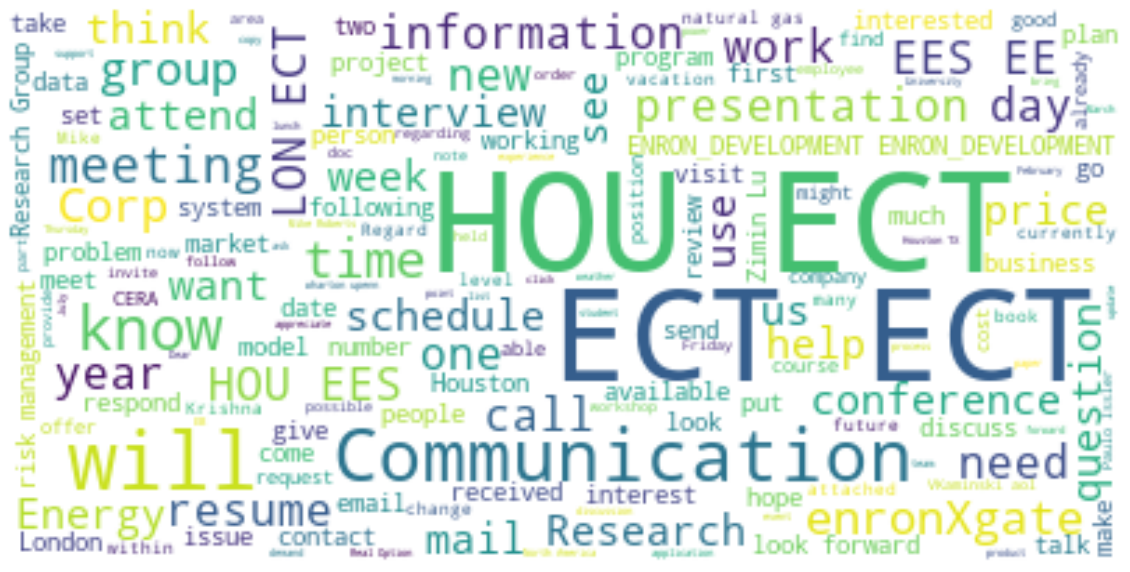

In [49]:
fig_kls = plt.figure(figsize=(20, 20))
wc_kls = WordCloud(max_font_size=50,
               max_words=200,
               stopwords=stopwords_kls,
               background_color="white").generate(content)

plt.imshow(wc_kls, interpolation="bilinear")
plt.axis("off")
wc.to_file('../plots/kaminski_ls_wordcloud2.png')

# Network Viz Lay

In [19]:
"""
# draw the edges
nx.draw_networkx_edges(G_lay, layout_lay, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_lay = [node for node in G_lay.nodes() if node in lay_edges['sender'].unique()]
size_lay = [G_lay.degree(node) * 80 for node in G_lay.nodes() if node in lay_edges['sender'].unique()]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=sender_lay, node_size=size_lay, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=recipients_lay, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique() and G_lay.degree(node) > 1]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=high_degree_recipients_lay, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_lay = dict(zip(sender_lay, sender_lay))
nx.draw_networkx_labels(G_lay, layout_lay, labels=sender_dict_lay)
"""

"\n# draw the edges\nnx.draw_networkx_edges(G_lay, layout_lay, edge_color='#AAAAAA')\n\n# create and draw sender nodes, sized according to their number of connections\nsender_lay = [node for node in G_lay.nodes() if node in lay_edges['sender'].unique()]\nsize_lay = [G_lay.degree(node) * 80 for node in G_lay.nodes() if node in lay_edges['sender'].unique()]\nnx.draw_networkx_nodes(G_lay, layout_lay, nodelist=sender_lay, node_size=size_lay, node_color='#8EB2A5')\n\n# create and draw all recipient nodes\nrecipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique()]\nnx.draw_networkx_nodes(G_lay, layout_lay, nodelist=recipients_lay, node_size=100, node_color='#ACA9BB')\n\n# create and draw popular recipients\nhigh_degree_recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique() and G_lay.degree(node) > 1]\nnx.draw_networkx_nodes(G_lay, layout_lay, nodelist=high_degree_recipients_lay, node_size=100, node_color='#474554')\n\n# l

In [20]:
# create network graph for Kaminski
G_lay = nx.from_pandas_edgelist(lay_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_lay = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_lay = nx.spring_layout(G_lay, k=0.1)

nx.draw_networkx(G_lay, layout_lay, node_size=25, node_color='#8EB2A5', with_labels=False, edge_color='#AAAAAA')

plt.axis('off')
#plt.title('Network of Kenneth Lay\'s sent emails')
plt.show()
fig_lay.savefig('../plots/lay_network1.png')

NameError: name 'lay_edges' is not defined

In [ ]:
# create nodes and edges
emails = [i['num_emails'] for i in dict(G_lay.edges).values()]
persons = [i for i in dict(G_lay.nodes).keys()]
persons = {i:i for i in dict(G_lay.nodes).keys()}

fig_lay2 = plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G_lay,)
nx.draw_networkx_nodes(G_lay, pos, label=persons, node_color='#8EB2A5')
nx.draw_networkx_edges(G_lay, pos, width=emails, alpha=0.4, edge_color='#AAAAAA')

plt.axis('off')
plt.title('Kenneth Lay\'s communication')
fig_lay.savefig('../plots/lay_network.png')

## Viz Lay & Skilling combined

In [ ]:
frames = [lay_edges, skilling_edges]

In [ ]:
lay_skilling = pd.concat(frames)
lay_skilling.info()

In [ ]:
lay_skilling[lay_skilling['recipient'].str.contains('l..wells@enron.com')]

In [ ]:
# create network graph for Lay & Skilling
G_ls = nx.from_pandas_edgelist(lay_skilling, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_ls = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_ls = nx.spring_layout(G_ls, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_ls, layout_ls, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_ls = [node for node in G_ls.nodes() if node in lay_skilling['sender'].unique()]
size_ls = [G_ls.degree(node) * 80 for node in G_ls.nodes() if node in lay_skilling['sender'].unique()]
nx.draw_networkx_nodes(G_ls, layout_kam, nodelist=sender_ls, node_size=size_ls, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_ls = [node for node in G_ls.nodes() if node in lay_skilling['recipient'].unique()]
nx.draw_networkx_nodes(G_ls, layout_kam, nodelist=recipients_ls, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_ls = [node for node in G_ls.nodes() if node in lay_skilling['recipient'].unique() and G_ls.degree(node) > 1]
nx.draw_networkx_nodes(G_ls, layout_kam, nodelist=high_degree_recipients_ls, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_ls = dict(zip(sender_ls, sender_ls))
nx.draw_networkx_labels(G_ls, layout_ls, labels=sender_dict_ls)

plt.axis('off')
#plt.title('Network of Kenneth\'s Outgoing Emails')
plt.legend()
plt.show()
fig_kam.savefig('../plots/lay_skilling_network.png')